# PROJECT ON UBER DATASETS (2015)

## URL of given datasets in raw format.

In [3]:
url ="https://raw.githubusercontent.com/rj-adity/PROJECT_BOOTCAMP-DS-/main/3-Uber_Data_New.csv"

#### Importing the libraries required for datasets.

In [5]:
import pandas as pd # importing pandas to convert the required datsets in form of dataframes.
import numpy as np # importing the numpy library to deal with numerical value and array of datsets.
from scipy.stats import zscore #to check the z score of the following numerical columns.
from dateutil import parser # it parses the date and time column.
from sklearn.preprocessing import StandardScaler #To scale the datsets on a huge level.
from sklearn.cluster import DBSCAN # to perform DBSCAN to find anomalies.
import seaborn as sns
import matplotlib.pyplot as plt # helps in visualising data on alarge scale.
from tabulate import tabulate #it deals with tthe tabulated value.
from collections import Counter #to count occurence of a variable.


**Reading the given datasets.**

In [7]:
df=pd.read_csv(url) # url is mentioned above.

**1. Display the top 5 rows.**

In [9]:
df.head() #displaying the top 5 rows.

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519.0,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,?
2,1/1/2015 1:00,EWR,0.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


**2. Display the last 5 rows.**

In [11]:
df.tail() #Displaying the last 5 rows.

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,30-06-2015 23:00,EWR,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,30-06-2015 23:00,Manhattan,3828.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,30-06-2015 23:00,Queens,580.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,30-06-2015 23:00,Staten Island,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,30-06-2015 23:00,NaN,3.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


**3. Check the shape of datsets.**

In [13]:
df.shape # checking the shape of the given datasets.

(29101, 13)

**4. Check the datatpe of each feature.**

In [15]:
df.info() #check the datatypes and information baout datsets.
df.dtypes # Checking the datatype of each feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


pickup_dt     object
borough       object
pickups      float64
spd          float64
vsb          float64
temp         float64
dewp         float64
slp          float64
pcp01        float64
pcp06        float64
pcp24        float64
sd           float64
hday          object
dtype: object

**5. Check the statistical summary.**

In [17]:
df.describe() #the describe method will gives us the summary of numerical values containing columns.

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29099.000000,29101.000000,29101.000000,28742.000000,29101.000000,2.910100e+04,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.236022,5.984924,8.818125,47.900262,30.823065,1.052633e+03,0.003830,0.026129,0.090464,2.529169
std,995.680628,3.699007,2.442897,19.800541,21.283444,5.945147e+03,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1.012500e+03,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.500000,30.000000,1.018200e+03,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,65.000000,50.000000,1.022900e+03,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1.015200e+06,0.280000,1.240000,2.100000,19.000000


In [18]:
df.describe(include="all") #include all will give us statistcal summary of all columns wether its numerical or not.

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
count,29101,26058,29099.000000,29101.000000,29101.000000,28742.000000,29101.000000,2.910100e+04,29101.000000,29101.000000,29101.000000,29101.000000,29101
unique,4343,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,1/1/2015 1:00,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,7,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27980
mean,NaN,NaN,490.236022,5.984924,8.818125,47.900262,30.823065,1.052633e+03,0.003830,0.026129,0.090464,2.529169,NaN
std,NaN,NaN,995.680628,3.699007,2.442897,19.800541,21.283444,5.945147e+03,0.018933,0.093125,0.219402,4.520325,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,1.000000,3.000000,9.100000,32.000000,14.000000,1.012500e+03,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,54.000000,6.000000,10.000000,46.500000,30.000000,1.018200e+03,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,449.000000,8.000000,10.000000,65.000000,50.000000,1.022900e+03,0.000000,0.000000,0.050000,2.958333,NaN


**6. Check the null values.**

In [20]:
df.isnull() #it will provides us with the null value of column in bool type as true and false.

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,False,False,False,False,False,False,False,False,False,False,False,False,False
29097,False,False,False,False,False,False,False,False,False,False,False,False,False
29098,False,False,False,False,False,False,False,False,False,False,False,False,False
29099,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum() #using sum wil give us count of the null values if present in such a column in our datasets.

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

**7. Check the duplicate values**

In [23]:
df.duplicated() #it wil show us the status of duplicate value in all rows.

0        False
1        False
2        False
3        False
4        False
         ...  
29096    False
29097    False
29098    False
29099    False
29100    False
Length: 29101, dtype: bool

In [24]:
#if there were to be found a duplicate value in our datsets the  we have to calcuulate it using sum function to know the cunt of the value.
df.duplicated().sum()

0

**8. Check the anomalies or wrong entries.**

In [26]:
#first w eneed to preprocess the datasets to make it suitable for our mmethod.
# second we need to conver pickup_dt to get in datetime format.
# Replace '?' with NaN and handle missing values
df.replace('?', np.nan, inplace=True)

# Convert 'pickup_dt' to string if it's not already
df['pickup_dt'] = df['pickup_dt'].astype(str)

# Parse the date and time column
df['pickup_dt'] = df['pickup_dt'].apply(lambda x: parser.parse(x, dayfirst=True))

# List of numerical columns
numerical_cols = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']

# Convert numerical columns to float (or appropriate type) if they are not already
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filling missing numerical values with the mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(df[numerical_cols]))

# Set a threshold for Z-scores, typically 3 or higher indicates an anomaly
threshold = 3

# Detect anomalies based on Z-scores
anomalies = (z_scores > threshold).any(axis=1)
anomalous_df = df[anomalies]

print("Anomalies detected in numerical columns:")
print(anomalous_df)

# Frequency analysis for 'borough' column
borough_freq = df['borough'].value_counts()

# Define a threshold for rare occurrences, e.g., less than 1% of total df
rare_threshold = 0.01 * len(df)

# Detect anomalies in 'borough' column
rare_boroughs = borough_freq[borough_freq < rare_threshold].index
categorical_anomalies = df[df['borough'].isin(rare_boroughs)]

print("Anomalies detected in categorical columns:")
print(categorical_anomalies)

# Combine numerical and categorical anomalies
combined_anomalies = pd.concat([anomalous_df, categorical_anomalies]).drop_duplicates()

print("Combined anomalies:")
print(combined_anomalies)

Anomalies detected in numerical columns:
                pickup_dt    borough  pickups  spd    vsb       temp  dewp  \
3     2015-01-01 01:00:00  Manhattan   5258.0  5.0  10.00  30.000000   7.0   
10    2015-01-01 02:00:00  Manhattan   4345.0  3.0  10.00  30.000000   6.0   
17    2015-01-01 03:00:00  Manhattan   4577.0  5.0  10.00  30.000000   8.0   
166   2015-01-02 02:00:00   Brooklyn    154.0  9.0  10.00  47.900262  16.0   
432   2015-01-03 18:00:00  Manhattan   3550.0  7.8   2.22  35.600000  29.0   
...                   ...        ...      ...  ...    ...        ...   ...   
29071 2015-06-30 19:00:00  Manhattan   4585.0  5.0  10.00  80.000000  58.0   
29078 2015-06-30 20:00:00  Manhattan   4210.0  8.0  10.00  80.000000  58.0   
29085 2015-06-30 21:00:00  Manhattan   4313.0  7.0  10.00  76.000000  61.0   
29091 2015-06-30 22:00:00  Manhattan   4452.0  5.0  10.00  76.000000  64.0   
29097 2015-06-30 23:00:00  Manhattan   3828.0  7.0  10.00  75.000000  65.0   

             slp   pcp

**Using DBSCAN algorithm to check anomalies and outliers.**

In [28]:
# Standardize the numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(df_scaled)

# Append DBSCAN results to the dataframe
df['dbscan_labels'] = dbscan.labels_

# Anomalies are the points labeled as -1
anomalies = df[df['dbscan_labels'] == -1]

print("Anomalies detected by DBSCAN:")
print(anomalies)

Anomalies detected by DBSCAN:
                pickup_dt    borough  pickups        spd        vsb  \
166   2015-01-02 02:00:00   Brooklyn    154.0   9.000000  10.000000   
425   2015-01-03 17:00:00  Manhattan   3375.0   7.000000   5.900000   
432   2015-01-03 18:00:00  Manhattan   3550.0   7.800000   2.220000   
439   2015-01-03 19:00:00  Manhattan   3979.0   7.500000   1.200000   
1859  2015-01-12 18:00:00  Manhattan   3528.0   5.200000   1.860000   
...                   ...        ...      ...        ...        ...   
28618 2015-06-28 00:00:00  Manhattan   7140.0  10.000000   2.666667   
28625 2015-06-28 01:00:00  Manhattan   5401.0   9.250000   2.625000   
28632 2015-06-28 02:00:00  Manhattan   3780.0   8.333333   2.666667   
28639 2015-06-28 03:00:00  Manhattan   2742.0  11.250000   4.625000   
28701 2015-06-28 12:00:00  Manhattan   2777.0   6.000000   4.000000   

            temp       dewp        slp     pcp01     pcp06  pcp24        sd  \
166    47.900262  16.000000  1015200.0

* detcting anamolies using DBSCAN on a categorical column.

In [30]:
# Frequency analysis for 'borough' column
borough_freq = df['borough'].value_counts()

# Define a threshold for rare occurrences, e.g., less than 1% of total df
rare_threshold = 0.01 * len(df)

# Detect anomalies in 'borough' column
rare_boroughs = borough_freq[borough_freq < rare_threshold].index
categorical_anomalies = df[df['borough'].isin(rare_boroughs)]

print("Anomalies detected in categorical columns:")
print(categorical_anomalies)

# Combine numerical and categorical anomalies
combined_anomalies = pd.concat([anomalous_df, categorical_anomalies]).drop_duplicates()

print("Combined anomalies:")
print(combined_anomalies)

Anomalies detected in categorical columns:
Empty DataFrame
Columns: [pickup_dt, borough, pickups, spd, vsb, temp, dewp, slp, pcp01, pcp06, pcp24, sd, hday, dbscan_labels]
Index: []
Combined anomalies:
                pickup_dt    borough  pickups  spd    vsb       temp  dewp  \
3     2015-01-01 01:00:00  Manhattan   5258.0  5.0  10.00  30.000000   7.0   
10    2015-01-01 02:00:00  Manhattan   4345.0  3.0  10.00  30.000000   6.0   
17    2015-01-01 03:00:00  Manhattan   4577.0  5.0  10.00  30.000000   8.0   
166   2015-01-02 02:00:00   Brooklyn    154.0  9.0  10.00  47.900262  16.0   
432   2015-01-03 18:00:00  Manhattan   3550.0  7.8   2.22  35.600000  29.0   
...                   ...        ...      ...  ...    ...        ...   ...   
29071 2015-06-30 19:00:00  Manhattan   4585.0  5.0  10.00  80.000000  58.0   
29078 2015-06-30 20:00:00  Manhattan   4210.0  8.0  10.00  80.000000  58.0   
29085 2015-06-30 21:00:00  Manhattan   4313.0  7.0  10.00  76.000000  61.0   
29091 2015-06-30 22

**9. Check the outliers and thier authenticity.**

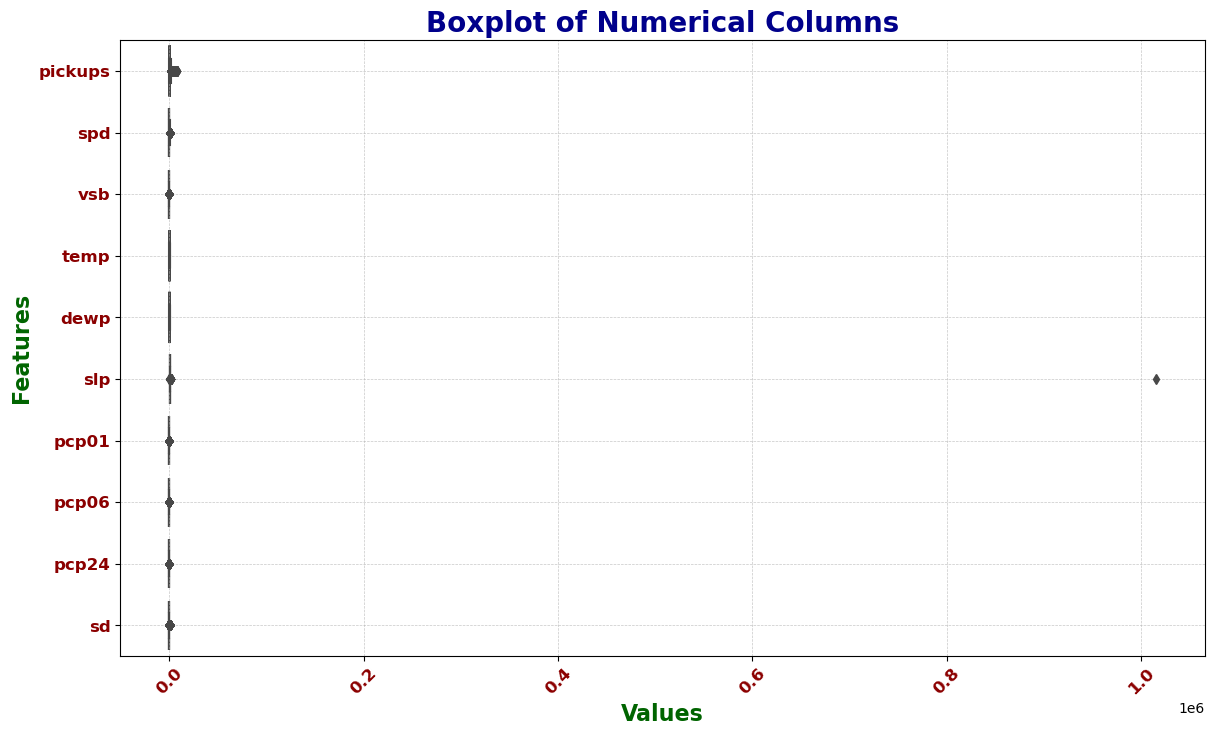


Outliers detected using IQR method:
+---------+----------------+
| Feature | Outliers Count |
+---------+----------------+
| pickups |      3498      |
|   spd   |      451       |
|   vsb   |      5322      |
|  temp   |       0        |
|  dewp   |       0        |
|   slp   |      281       |
|  pcp01  |      2633      |
|  pcp06  |      5641      |
|  pcp24  |      5016      |
|   sd    |      6060      |
+---------+----------------+


In [32]:
# Define a function to detect outliers using IQR
def detect_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Identify outliers in numerical columns using IQR
outliers_iqr = df[numerical_cols].apply(detect_iqr)

# Set up the plot
plt.figure(figsize=(14, 8))

# Create the boxplot with the 'Spectral' palette
sns.boxplot(data=df[numerical_cols], orient='h', palette='Spectral', notch=True)

# Add title and labels
plt.title('Boxplot of Numerical Columns', fontsize=20, color='darkblue', weight='bold')
plt.xlabel('Values', fontsize=16, color='darkgreen', weight='bold')
plt.ylabel('Features', fontsize=16, color='darkgreen', weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, color='darkred', weight='bold')

# Customize y-axis labels
plt.yticks(fontsize=12, color='darkred', weight='bold')

# Add grid for better visualization of values
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()

# Display the outliers found using IQR
outlier_counts = outliers_iqr.sum()

# Print outlier counts with tabulate for better formatting
outlier_table = tabulate(outlier_counts.reset_index().values, headers=["Feature", "Outliers Count"], tablefmt="pretty")
print("\nOutliers detected using IQR method:")
print(outlier_table)

* Using a violin plot to get a better visualisation.

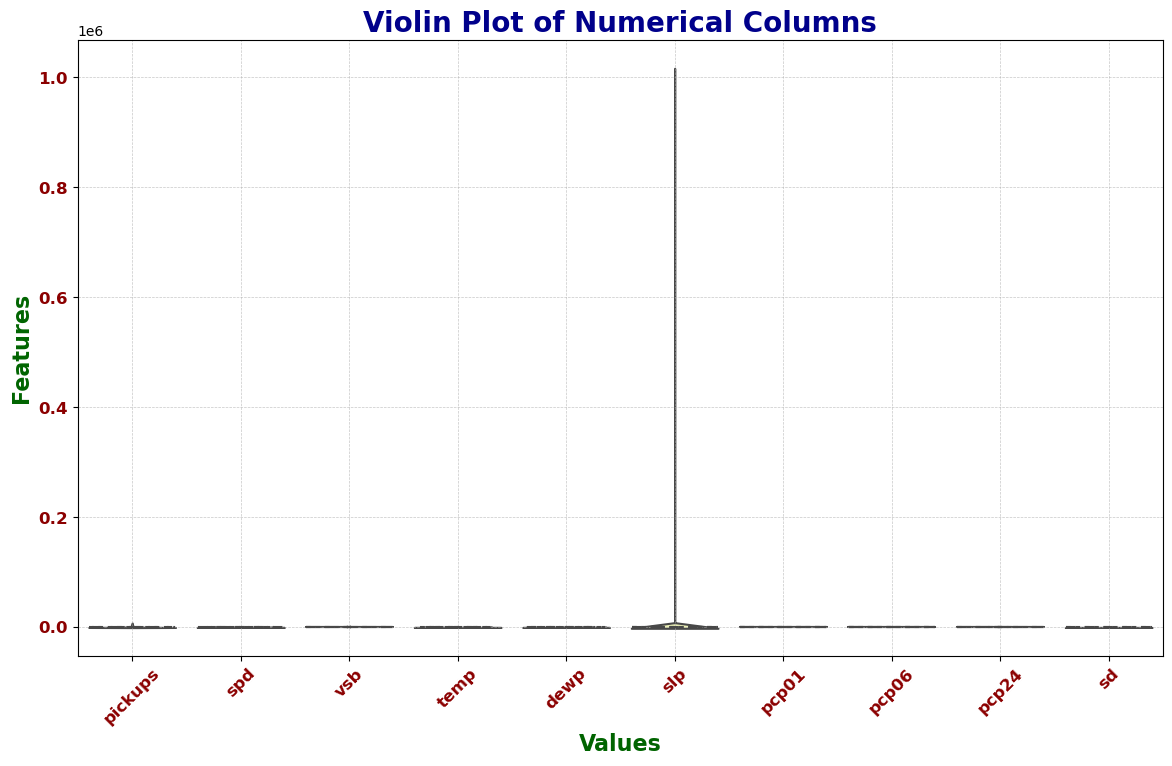


Outliers detected using IQR method:
+---------+----------------+
| Feature | Outliers Count |
+---------+----------------+
| pickups |      3498      |
|   spd   |      451       |
|   vsb   |      5322      |
|  temp   |       0        |
|  dewp   |       0        |
|   slp   |      281       |
|  pcp01  |      2633      |
|  pcp06  |      5641      |
|  pcp24  |      5016      |
|   sd    |      6060      |
+---------+----------------+


In [34]:
# Set up the plot
plt.figure(figsize=(14, 8))

# Create the violin plot with the 'Spectral' palette
sns.violinplot(data=df[numerical_cols], palette='Spectral', inner='quartile', scale='width')

# Add title and labels
plt.title('Violin Plot of Numerical Columns', fontsize=20, color='darkblue', weight='bold')
plt.xlabel('Values', fontsize=16, color='darkgreen', weight='bold')
plt.ylabel('Features', fontsize=16, color='darkgreen', weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, color='darkred', weight='bold')

# Customize y-axis labels
plt.yticks(fontsize=12, color='darkred', weight='bold')

# Add grid for better visualization of values
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()

# Define a function to detect outliers using IQR
def detect_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Identify outliers in numerical columns using IQR
outliers_iqr = df[numerical_cols].apply(detect_iqr)

# Display the outliers found using IQR
outlier_counts = outliers_iqr.sum()

# Print outlier counts with tabulate for better formatting
outlier_table = tabulate(outlier_counts.reset_index().values, headers=["Feature", "Outliers Count"], tablefmt="pretty")
print("\nOutliers detected using IQR method:")
print(outlier_table)

**10. Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.**

In [36]:
df.drop_duplicates()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,dbscan_labels
0,2015-01-01 01:00:00,Bronx,152.0,5.0,10.0,30.000000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,0
1,2015-01-01 01:00:00,Brooklyn,1519.0,5.0,10.0,47.900262,7.0,1023.5,0.0,0.0,0.0,0.0,NaN,0
2,2015-01-01 01:00:00,EWR,0.0,5.0,10.0,30.000000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,0
3,2015-01-01 01:00:00,Manhattan,5258.0,5.0,10.0,30.000000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,0
4,2015-01-01 01:00:00,Queens,405.0,5.0,10.0,30.000000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0.0,7.0,10.0,75.000000,65.0,1011.8,0.0,0.0,0.0,0.0,N,0
29097,2015-06-30 23:00:00,Manhattan,3828.0,7.0,10.0,75.000000,65.0,1011.8,0.0,0.0,0.0,0.0,N,0
29098,2015-06-30 23:00:00,Queens,580.0,7.0,10.0,75.000000,65.0,1011.8,0.0,0.0,0.0,0.0,N,0
29099,2015-06-30 23:00:00,Staten Island,0.0,7.0,10.0,75.000000,65.0,1011.8,0.0,0.0,0.0,0.0,N,0


* Removing  unecessary columns.

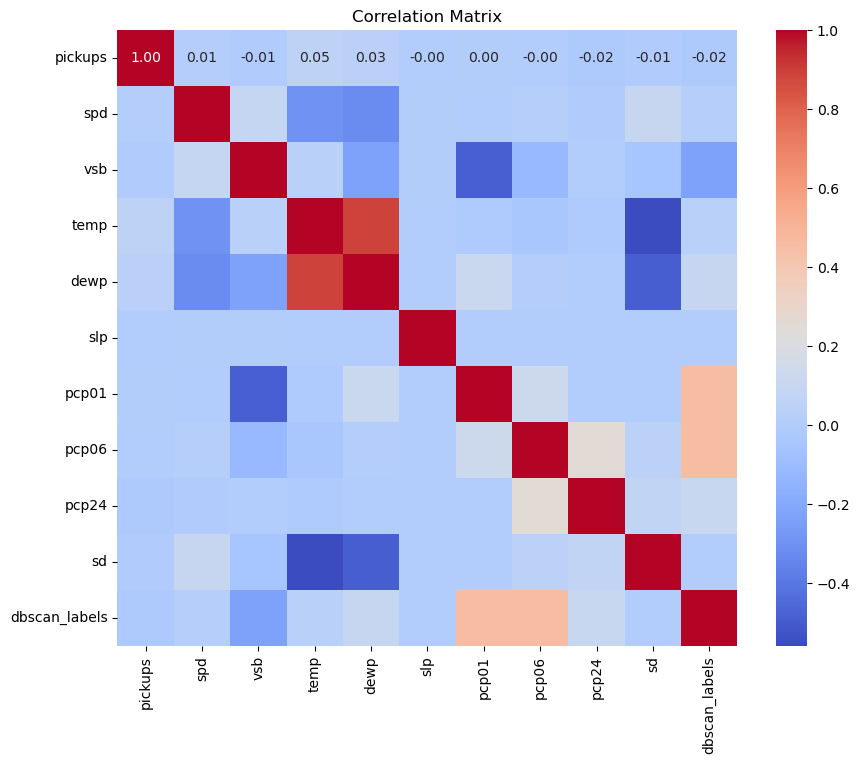

In [38]:
#first we will check correlation matrix for further steps.

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns
numeric_df = df.drop(columns=non_numeric_cols)

# Convert remaining columns to numeric (if needed)
numeric_df = numeric_df.apply(pd.to_numeric, errors='ignore')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize correlation matrix (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
df.to_csv('df1.csv', index=False)

In [47]:

# Specify columns to keep
columns_to_keep = ['pickup_dt', 'borough', 'pickups', 'spd']

# Drop unnecessary columns
df = df[columns_to_keep]

# Display the updated DataFrame
print(df.head())

            pickup_dt    borough  pickups  spd
0 2015-01-01 01:00:00      Bronx    152.0  5.0
1 2015-01-01 01:00:00   Brooklyn   1519.0  5.0
2 2015-01-01 01:00:00        EWR      0.0  5.0
3 2015-01-01 01:00:00  Manhattan   5258.0  5.0
4 2015-01-01 01:00:00     Queens    405.0  5.0


* Null value imputation.

In [41]:
print(df.columns)

Index(['pickup_dt', 'borough', 'pickups', 'spd'], dtype='object')


In [49]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Impute null values for numerical columns with the mean
numerical_cols = ['pickups', 'spd', 'pickup_dt']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute null values for categorical columns with the mode
categorical_cols = ['borough',]
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Display the updated DataFrame
print(df.head())

            pickup_dt    borough  pickups  spd
0 2015-01-01 01:00:00      Bronx    152.0  5.0
1 2015-01-01 01:00:00   Brooklyn   1519.0  5.0
2 2015-01-01 01:00:00        EWR      0.0  5.0
3 2015-01-01 01:00:00  Manhattan   5258.0  5.0
4 2015-01-01 01:00:00     Queens    405.0  5.0


* Treating outliers in our datasets.

**1. Pickup Analysis**

*  **What is the total numbers of Uber pickups across all boroughs?**

In [63]:
# Counting occurrences of Uber pickups across all boroughs
total_pickups = df['borough'].value_counts()

# Displaying the count
print(total_pickups)

# Calculate the total number of Uber pickups across all boroughs
total_pickups = df['pickups'].sum()

# Display the total number of pickups
print("Total number of Uber pickups across all boroughs:", total_pickups)



borough
Bronx            7386
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: count, dtype: int64
Total number of Uber pickups across all boroughs: 14266358.472043712


* **Which borough has the highest average number of hourly pickups?**

In [65]:
# Group the DataFrame by 'borough' and 'pickup_dt' hour, and calculate the average number of pickups
hourly_avg_pickups = df.groupby(['borough', df['pickup_dt'].dt.hour])['pickups'].mean()

# Find the borough with the highest average number of hourly pickups
highest_avg_borough = hourly_avg_pickups.groupby(level=0).idxmax().reset_index()['borough']

# Display the result
print("Borough(s) with the highest average number of hourly pickups:", highest_avg_borough.tolist())


Borough(s) with the highest average number of hourly pickups: ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island']


In [67]:
# Example data
highest_avg_borough = ['Bronx', 'Brooklyn', 'Manhattan', 'Brooklyn', 'Manhattan', 'Manhattan']

# Calculate the number of occurrences for the variable
occurrences = len(highest_avg_borough)

# Display the result
print("Number of occurrences for variable highest_avg_borough:", occurrences)


Number of occurrences for variable highest_avg_borough: 6


In [69]:
highest_avg_borough = ['Bronx', 'Brooklyn', 'Manhattan', 'Brooklyn', 'Manhattan', 'Manhattan']

# Use Counter to count the occurrences of each borough
borough_counts = Counter(highest_avg_borough)

# Find the borough with the highest count
most_common_borough = borough_counts.most_common(1)[0][0]
highest_count = borough_counts[most_common_borough]

# Display the result
print("The borough with the highest count is:", most_common_borough)
print("Number of occurrences:", highest_count)

The borough with the highest count is: Manhattan
Number of occurrences: 3


* **How do the number of pickups vary across different hours of the day?**

In [78]:
# Extract the hour component from the 'pickup_dt' column
df['hour'] = df['pickup_dt'].dt.hour

# Group the data by hour and calculate the total number of pickups for each hour
hourly_pickups = df.groupby('hour')['pickups'].sum()

# Display the result
print(hourly_pickups)


hour
0     7.067090e+05
1     4.920360e+05
2     3.194790e+05
3     2.139880e+05
4     1.740112e+05
5     1.743440e+05
6     2.311120e+05
7     3.600540e+05
8     5.256620e+05
9     6.078700e+05
10    5.509510e+05
11    5.098480e+05
12    5.323780e+05
13    5.304590e+05
14    5.577610e+05
15    6.186840e+05
16    6.839130e+05
17    8.020510e+05
18    9.320350e+05
19    1.013258e+06
20    9.776460e+05
21    9.367470e+05
22    9.284082e+05
23    8.869540e+05
Name: pickups, dtype: float64


* **Plotting graph to visualise it more easily and understand the variation in pickups through graphs.**

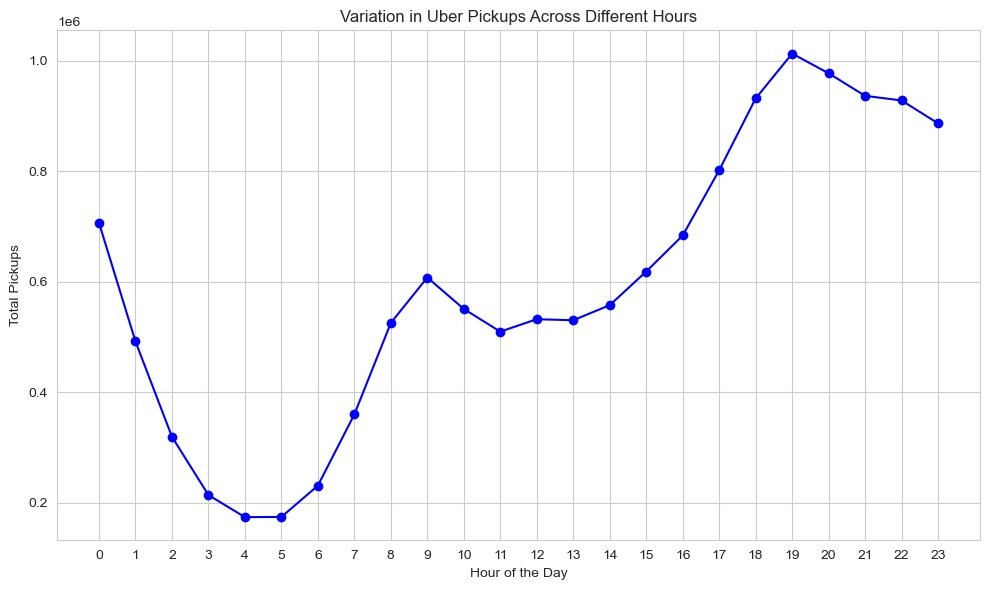

In [90]:
# Data
hours = hourly_pickups.index
pickups = hourly_pickups.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(hours, pickups, marker='o', color='b', linestyle='-')
plt.title('Variation in Uber Pickups Across Different Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Pickups')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()

# Show plot
plt.show()

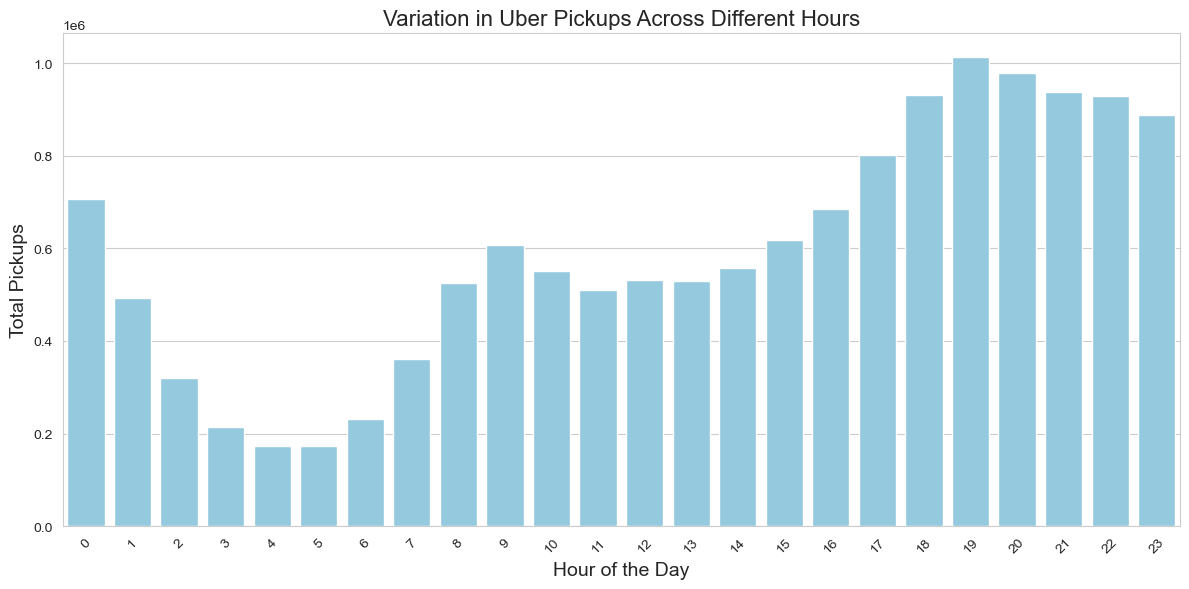

In [86]:
# Creating a vertical bar plot.
# Set the style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hours, y=pickups, color='skyblue')
plt.title('Variation in Uber Pickups Across Different Hours', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Pickups', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

* **Which day of the week has the highest number of pickups?**

In [102]:
# Extract the hour component from the 'pickup_dt' column
df['day_of_week'] = df['pickup_dt'].dt.day_name()

# Group the data by hour and calculate the total number of pickups for each hour
daily_pickups = df['day_of_week'].value_counts()

# Display the result
print(daily_pickups)

day_of_week
Friday       4219
Saturday     4213
Sunday       4204
Thursday     4167
Monday       4158
Tuesday      4134
Wednesday    4006
Name: count, dtype: int64


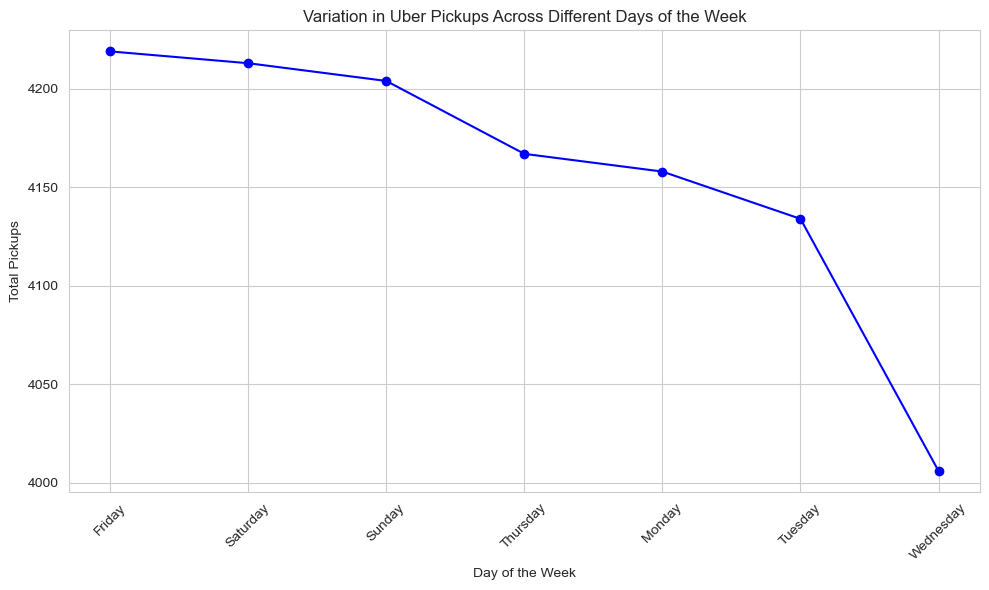

In [113]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(day_of_week, pickups, marker='o', color='b', linestyle='-')
plt.title('Variation in Uber Pickups Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pickups')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()


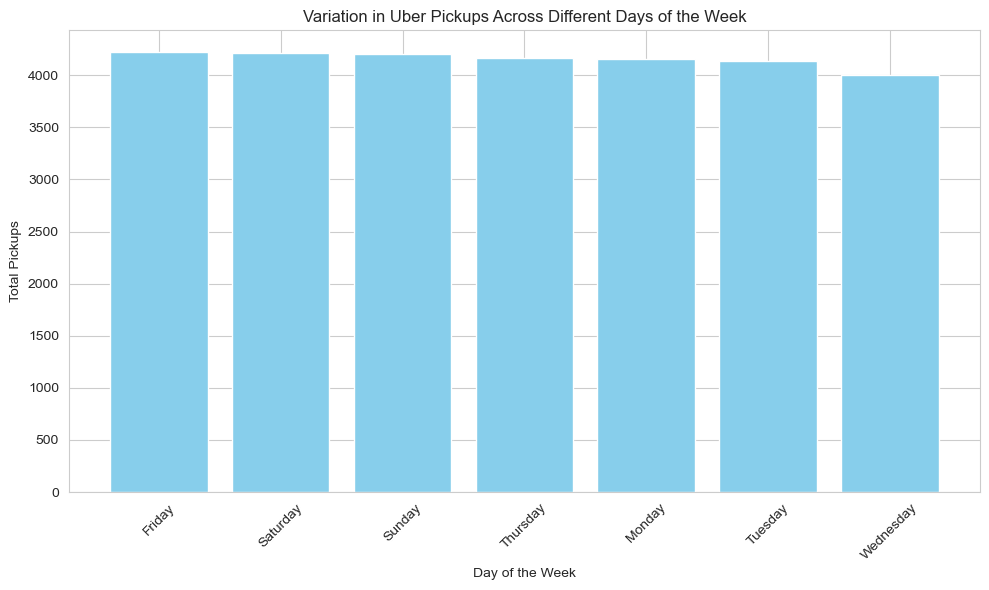

In [121]:
# Data
day_of_week = ['Friday', 'Saturday', 'Sunday', 'Thursday', 'Monday', 'Tuesday', 'Wednesday']
pickups = [4219, 4213, 4204, 4167, 4158, 4134, 4006]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(day_of_week, pickups, color='skyblue')
plt.title('Variation in Uber Pickups Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pickups')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
